# Data Augmentation using DCGAN for Efficient Prediction of COVID-19 

## Part- 1: Using CNN on the available dataset 

Import the required libraries and functions

In [ ]:
%matplotlib inline
import numpy as np
import os
import sys
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.optimizers import RMSprop, Adam
from keras.layers import MaxPooling2D, Conv2D, Conv2DTranspose
from keras.layers import Input, Reshape, LeakyReLU
from keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import CSVLogger
from keras.models import Sequential, Model
from keras.utils.vis_utils import plot_model
from numpy.random import randn
from numpy.random import randint

Mount Google drive in order to access the dataset

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/X-ray dataset/"
training_data_dir = path + "Train" 
validation_data_dir = path + "Validation"
training_new_data_dir = path + "Train_New"  

Mounted at /content/drive/


In [ ]:
IMAGE_SIZE = 256
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 10
BATCH_SIZE_TRAIN = 40
BATCH_SIZE_VALIDATION = 20

Generate batches of tensor image data with real-time data augmentation using 'ImageDataGenerator()'

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 10,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   vertical_flip = True)
train_new_generator = ImageDataGenerator(rescale = 1./255.,
                                         rotation_range = 10,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         vertical_flip = True)
valid_generator = ImageDataGenerator( rescale = 1.0/255.)

In [ ]:
train_batches = train_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE_TRAIN,
    interpolation='nearest')
train_new_batches = train_new_generator.flow_from_directory(
    training_new_data_dir,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE_TRAIN,
    interpolation='nearest')
valid_batches = valid_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE_VALIDATION,
    class_mode='binary',
    interpolation='nearest')

Found 344 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


Build the CNN Model

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(256, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())

model_1.add(Dense(1))
model_1.add(Activation('sigmoid'))
    
model_1.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])
    
model_1.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 128)       0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Run the model to fit it with the dataset. 

In [ ]:
history = model_1.fit(
    train_batches,
    steps_per_epoch=int(len(train_batches.filenames)//BATCH_SIZE_TRAIN),
    epochs= EPOCHS,
    verbose=1,
    validation_data=valid_batches,
    validation_steps=len(valid_batches.filenames)//BATCH_SIZE_VALIDATION)

Epoch 1/10
8/8 [==============================] - 143s 12s/step - loss: 0.7070 - accuracy: 0.5245 - val_loss: 0.6637 - val_accuracy: 0.5750
Epoch 2/10
8/8 [==============================] - 5s 595ms/step - loss: 0.6832 - accuracy: 0.5603 - val_loss: 0.6486 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 5s 614ms/step - loss: 0.6782 - accuracy: 0.5567 - val_loss: 0.6482 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 5s 640ms/step - loss: 0.6601 - accuracy: 0.5617 - val_loss: 0.6230 - val_accuracy: 0.5750
Epoch 5/10
8/8 [==============================] - 5s 626ms/step - loss: 0.6220 - accuracy: 0.6341 - val_loss: 0.5951 - val_accuracy: 0.6125
Epoch 6/10
8/8 [==============================] - 5s 649ms/step - loss: 0.6228 - accuracy: 0.5974 - val_loss: 0.5754 - val_accuracy: 0.5875
Epoch 7/10
8/8 [==============================] - 5s 628ms/step - loss: 0.6148 - accuracy: 0.7092 - val_loss: 0.5312 - val_accuracy: 0.8250
Epoch 8/10
8/8 [====

Plot the training and validation accuracy as well as loss. 

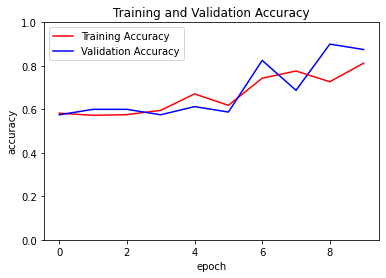

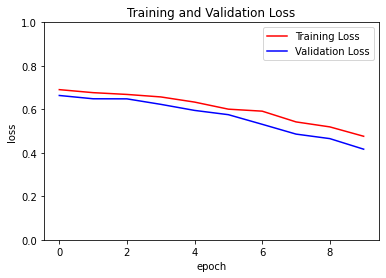

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
#plot the epoch vs accuracy graph
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(ymax=1.0, ymin=0.0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc=0)
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
#plot the epoch vs loss graph
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylim(ymax=1.0, ymin=0.0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

## Part- 2: Building, Training and Generating the GAN model

Convert the image data into arrays to be able to process them

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
path_train_covid = training_data_dir + "/Covid"
dir_list = os.listdir(path_train_covid)
dataset = np.ndarray(shape=(len(dir_list),256,256,3), dtype=np.float32)
i = 0
for ifile in dir_list:
  img = load_img(path_train_covid+'/'+ifile)
  x = img_to_array(img)
  x = (x - 127.5)/127.5
  dataset[i] = x
  i += 1
#print(dataset)
print(dataset.shape)

(144, 256, 256, 3)


Build and train the discriminator and generator models

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(256,256,3)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model 

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()

	n_nodes = 256 * 32 * 32
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((32, 32, 256)))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False

	model = Sequential()

	model.add(g_model)
	model.add(d_model)

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare the training images
def load_real_samples():
	path_train_covid = training_data_dir + "/Covid"
	dir_list = os.listdir(path_train_covid)
	dataset = np.ndarray(shape=(len(dir_list),256,256,3),dtype=np.float32)
	i = 0
	for ifile in dir_list:
		img = load_img(path_train_covid+'/'+ifile)
		x = img_to_array(img)
		x = (x - 127.5)/127.5
		dataset[i] = x
		i += 1
	return dataset

# select real samples
def generate_real_samples(dataset, n_samples):
  #choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples,1),dtype=int)
  return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = np.zeros((n_samples,1),dtype=int)
	return X, y

# create and save a plot of generated images
def save_plot(examples, epoch, n=5):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	for i in range(n*n):
		plt.subplot(1,1,1)
		plt.axis('off')
		plt.imshow(examples[i])
		filename = '/content/drive/My Drive/X-ray dataset/Train_Generated/generated_xray_e%03d.png' % (epoch+i+1)
		plt.savefig(filename)
		plt.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	X_real, y_real = generate_real_samples(dataset, n_samples)
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	save_plot(x_fake, epoch)
	#filename = 'generator_model_%03d.h5' % (epoch+1)
	#g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=400, n_batch=32):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)

	for i in range(n_epochs):
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = np.ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
d_model.summary()
# create the generator
g_model = define_generator(latent_dim)
g_model.summary()
# create the gan
gan_model = define_gan(g_model, d_model)
gan_model.summary()
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 256)      

KeyboardInterrupt: ignored

## Part- 3: Use the same CNN model architecture for validating the performance of GAN

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(256, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))
    
model_2.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])
    
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 128)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Fit the model by running it with the new dataset. 

In [ ]:
history = model_2.fit(
    train_new_batches,
    steps_per_epoch=int(len(train_new_batches.filenames)//BATCH_SIZE_TRAIN),
    epochs= EPOCHS,
    verbose=1,
    validation_data=valid_batches,
    validation_steps=len(valid_batches.filenames)//BATCH_SIZE_VALIDATION,
    shuffle=True)

Epoch 1/10
10/10 [==============================] - 82s 8s/step - loss: 0.7000 - accuracy: 0.5040 - val_loss: 0.7198 - val_accuracy: 0.4125
Epoch 2/10
10/10 [==============================] - 6s 585ms/step - loss: 0.6865 - accuracy: 0.5245 - val_loss: 0.6931 - val_accuracy: 0.4000
Epoch 3/10
10/10 [==============================] - 6s 581ms/step - loss: 0.6643 - accuracy: 0.6610 - val_loss: 0.6455 - val_accuracy: 0.5750
Epoch 4/10
10/10 [==============================] - 6s 619ms/step - loss: 0.6720 - accuracy: 0.6210 - val_loss: 0.6703 - val_accuracy: 0.4375
Epoch 5/10
10/10 [==============================] - 6s 579ms/step - loss: 0.6210 - accuracy: 0.6730 - val_loss: 0.6279 - val_accuracy: 0.6625
Epoch 6/10
10/10 [==============================] - 6s 577ms/step - loss: 0.5679 - accuracy: 0.7166 - val_loss: 0.5149 - val_accuracy: 0.7125
Epoch 7/10
10/10 [==============================] - 6s 619ms/step - loss: 0.5241 - accuracy: 0.7834 - val_loss: 0.5535 - val_accuracy: 0.7750
Epoch 8/

Plot the training and validation accuracy and loss after including the data generated by the GAN model.

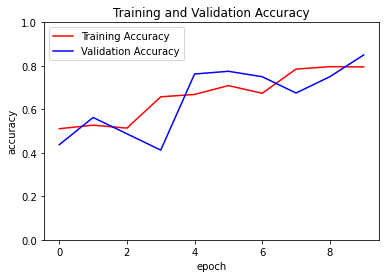

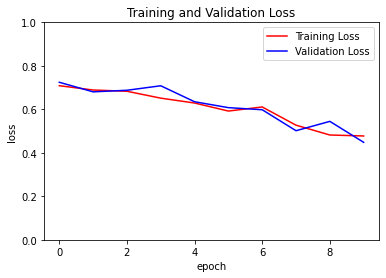

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
#plot epoch vs accuracy graph
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(ymax=1.0, ymin=0.0)
plt.legend(loc=0)
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
#plot epoch vs loss graph
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(ymax=1.0, ymin=0.0)
plt.legend(loc=0)
plt.show()